# Minitrabalho de DAA
Trabalho realizado por:
- Gonçalo Ribeiro, nº 110730
- Rodrigo Leitão, nº 111008

## **1)** Algoritmo de força-bruta

#### **1.a)** [1 valor] Descreva brevemente qual seria o algoritmo de força-bruta que resolve o problema do número de inversões num array.

**R.:** Um algoritmo no qual se corre o array todo e que por cada elemento se verificam todos os elementos à sua frente e em todos que satisfaçam a condição de serem menores, incrementa-se uma variável que guarda o total de ocorrências.

#### **1.b)** [1 valor] Implemente em Python o algoritmo descrito na alínea anterior. O algoritmo deve receber como entrada uma coleção de inteiros, e devolver o número de inversões encontrados nesta coleção.

In [20]:
def forca_bruta(array):
    result = 0
    size = len(array)
    for i in range(size):
        for j in range(i+1, size):
            if array[i] > array[j]:
                result += 1
    return result

#### **1.c)** [3 valores] Apresente uma análise assintótica do seu algoritmo, considerando o número de acessos ao array (ou seja, o número de acessos para leitura e escrita de uma posição do array) que são executados para **o seu algoritmo** em função do tamanho, **n**, do array.

- **Nota:** É esperado que sejam apresentados os cálculos completos do número de acessos assim como a correspondente conclusão sobre o tempo de execução do algoritmo (utilizando notação assintótica).

**R.:** No nosso algortimo podemos observar dois loops `for`, em que o primeiro percorre o array todo, e o segundo percorre os elementos à direita do atual do primeiro loop. 

Tendo isto em conta e que por cada ciclo completo são feitos 2 acessos ao array durante a comparação, podemos concluir que o número total de acessos, em função do tamanho, n, do array, vai ser: $2\times\frac{(n-1)n}{2}$ (obtém-se através da adaptação da fórmula da soma dos n primeiros números naturais, uma vez que no primeiro ciclo completo fazemos n - 1 comparações), simplificando $(n-1)n$.

Concluimos então que o tempo de execução do algoritmo, em notação assintótica é $O(n^2)$.

## **2)** Algoritmo dividir-e-conquistar

#### **2.a)** [3 valores] Proponha uma solução melhorada que utilize a estratégia dividir-e-conquistar para resolver o problema do número de inversões num array de forma mais eficiente.

- **Nota:** É esperado que sejam descritos os passos básicos para a conceção do seu algoritmo. Deve também apresentar o pseudocódigo correspondente.
- **Dica:** A solução passará por utilizar um dos algoritmos de ordenação abordados nas aulas.

O nosso algoritmo baseia-se no merge sort e funciona da seguinte forma:
- divide o array em metades até todas serem de tamanho 1
- junta as metades ordenando-as e contando as inversões
- sempre que um elemento da direita é maior que um elemento da esquerda, são contadas tantas inversões quantos elementos restam na metade esquerda

```
def versao_melhorada(arr):
    _, inversions = count_inversions(arr)
    return inversions

def count_inversions(arr):
    if len of arr <= 1:
        return arr, 0
    else:
        mid = ⌊len of arr / 2⌋
        left, inv_left = count_inversions(arr from start to mid)
        right, inv_right = count_inversions(arr from mid to end)
        merged, inv_merge = merge_and_count(left, right)
        return merged, inv_left + inv_right + inv_merge

def merge_and_count(left, right):
    i = j = inv_count = 0

    while i < len of left and j < len of right:
        if left[i] <= right[j]:
            append left[i] to merged
            i += 1
        else:
            append right[j] to merged
            inv_count += remaining items in left
            j += 1

    append remaining items in left to merged
    append remaining items in right to merged
    return merged, inv_count
```

#### **2.b)** [2 valores] Implemente em Python o algoritmo descrito na alínea anterior. O algoritmo deve receber como entrada uma coleção de inteiros, e devolver o número de inversões encontrados nesta coleção.

In [21]:
def versao_melhorada(arr):
    _, inversions = count_inversions(arr)
    return inversions

def count_inversions(arr):
    if len(arr) <= 1:
        return arr, 0
    else:
        mid = len(arr) // 2
        left, inv_left = count_inversions(arr[:mid])
        right, inv_right = count_inversions(arr[mid:])
        merged, inv_merge = merge_and_count(left, right)
        return merged, inv_left + inv_right + inv_merge

def merge_and_count(left, right):
    i = j = inv_count = 0
    merged = []
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            inv_count += len(left) - i
            j += 1
    merged += left[i:]
    merged += right[j:]
    return merged, inv_count

print(forca_bruta([10, 1, 8, 3, 6, 5, 4, 7, 2, 9]))
print(versao_melhorada([10, 1, 8, 3, 6, 5, 4, 7, 2, 9]))

23
23


#### **2.c)** [3 valores] Utilizando o método de indução, mostre que o seu algoritmo está correto.

- **Nota:** Inicie por apresentar um pseudocódigo simplificado do seu algoritmo (se ainda não o fez na
alínea **2.a)**). Para facilitar, pode também considerar que o tamanho **n** do array é uma potência de 2.

Hipótese de Indução: O algoritmo está correto para todos os arrays de tamanho menor ou igual a n.

Caso Base: Para um array de tamanho menor ou igual a 1, o algoritmo está correto pois não há inversões.

Passo Indutivo: Provar que o algoritmo está correto para $k=n$, assumindo que a hipótese de indução é verdadeira para $k<n$.

O array é dividido em duas metades e, pela hipótese de indução, sabemos que o algoritmo conta corretamente as inversões em cada metade. 

Agora, precisamos de considerar as inversões entre as duas metades, que são contadas pela função merge_and_count. Esta função percorre cada metade uma vez, comparando o elemento atual da esquerda com o elemento atual da direita. Se o elemento da esquerda for menor ou igual ao da direita, avançamos para o próximo elemento da esquerda. Se o elemento da esquerda for maior que o da direita, sabemos que ele é maior que todos os elementos restantes na metade esquerda (vamos ordenando com o merge e quando chega o merge_and_count de duas metades com n/2 elementos (o último merge), estas já estão ordenadas), então adicionamos o número de elementos restantes na metade esquerda ao contador de inversões.

Conclusão: Todas as inversões são contadas corretamente e por isso o algoritmo devolve o número de inversões para qualquer array de tamanho menor ou igual a n.

#### **2.d)** [3 valores] Apresente uma análise assintótica do seu algoritmo, utilizando uma das técnicas abordadas em aula, ou seja, o teorema principal, ou o método da indução e substituição.

- **Nota:** É esperado que apresente a fórmula recorrente do cálculo do trabalho do seu algoritmo bem como os passos necessários para estabelecer a ordem de complexidade do algoritmo (utilizando notação assintótica).

• O caso base (tamanho 1) e a divisão (cálculo do mid) têm custo contante: O(1)

• São feitas 2 chamadas recorrentes para metade (aproximadamente, devido aos arredondamentos) dos elementos da entrada: n/2 (na verdade, faz ⌊n/2⌋)

• O custo de merge_and_count é O(n) visto que os dois arrays de tamanho n/2 são percorridos na totalidade

Logo a fórmula recorrente é $T(n)=2T(\frac{n}{2})+O(n)$

E, pelo teorema principal, a ordem de complexidade do algoritmo é $O(n\log n)$, pois $a=b^d$ ($2=2^1$) que corresponde à fórmula $T(n)=O(n^d\log n)$.

## **3)** Análise empírica

#### **3.a)** [1 valores] Crie uma bateria de testes e cronometre o tempo de execução de cada um dos algoritmos desenvolvidos em **1)** e **2)**. Repita cada cronometragem, pelo menos, 35 vezes e registe o tempo médio de execução para cada algoritmo.

- **Nota:** Exatamente a mesma coleção deve ser gerada antes das invocações dos diferentes algoritmos nos respetivos testes. Esta coleção deve conter números inteiros aleatórios sem repetição.

In [22]:
from time import time
from random import choice

def tryItABunch(myFn, startN=10, endN=1000, stepSize=10, numTrials=35, listMax=10):
    nValues = []
    tValues = []
    for n in range(startN, endN, stepSize):
        # run myFn several times and average to get a decent idea.
        runtime = 0
        lst = [choice(range(listMax)) for i in range(n)]  # generate a *random* list of length n
        for t in range(numTrials):
            start = time()
            myFn(lst)
            end = time()
            runtime += (end - start) * 1000  # measure in milliseconds
        runtime = runtime / numTrials
        nValues.append(n)
        tValues.append(runtime)
    return nValues, tValues

In [23]:
# Função de teste apenas para gerar o gráfico de O(n^2)
def quadratica(arr):
	for i in range(len(arr)):
		for j in range(len(arr)):
			arr[i] > arr[j]

In [24]:
from math import log

# Função de teste apenas para gerar o gráfico de O(n log n)
def nLogN(arr):
    for i in range(len(arr)):
        for j in range(int(log(len(arr)))):
            arr[i] > arr[j]

In [37]:
nValuesLog, tValuesLog = tryItABunch(nLogN)
nValuesQuad, tValuesQuad = tryItABunch(quadratica)

In [38]:
nValues, tValues = tryItABunch(versao_melhorada)

In [39]:
nValuesBrute, tValuesBrute = tryItABunch(forca_bruta)

#### **3.b)** [2 valores] Faça o plot dos tempos de execução dos dois algoritmos propostos em **1)** e em **2)**. Que conclusões tira?

- **Nota:** É esperado que verifique se é possível estabelecer ligações entre as ordens de complexidade de cada algoritmo.

Text(0.5, 1.0, 'Comparação de tempo de execução')

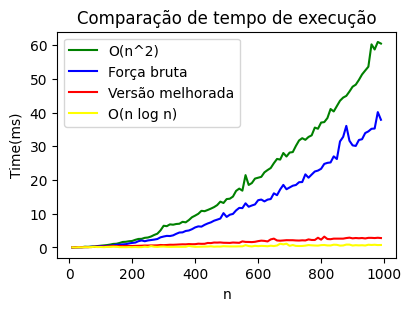

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4, 3), layout='constrained')
plt.plot(nValuesQuad, tValuesQuad, color="green", label="O(n^2)")
plt.plot(nValuesBrute, tValuesBrute, color="blue", label="Força bruta")
plt.plot(nValues, tValues, color="red", label="Versão melhorada")
plt.plot(nValuesLog, tValuesLog, color="yellow", label="O(n log n)")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Comparação de tempo de execução")

O gráfico dos tempos de execução permite-nos concluir que o algoritmo de força bruta tem um desempenho bastante próximo a $O(n^2)$, porém ligeiramente inferior, uma vez que sua ordem de complexidade é dada pela expressão $2\times\frac{(n-1)n}{2}$ calculada acima, devido ao facto de que cada iteração vai desde o índice atual até ao fim do array em vez de percorrer o array todo novamente.

Já a versão melhorada do algoritmo apresenta um gráfico muito semelhante a $O(n\log n)$, apesar de que ligeiramente superior (sendo a diferença infrior a 5ms, portanto pouco relevante). Apesar disso, esta pequena diferença foi consistente em todos os testes realizados e pode-se dever ao facto de que o algoritmo conta as inversões e guarda-as em memória para passar o resultado para a execução seguinte do ciclo recursivo. Esta é apenas uma hipótese, porém pareceu-nos ser a mais plausível.

## **4)** Extra

#### **4.a)** [1 valor] Proponha possíveis melhorias ao algoritmo apresentado em **2)** e refaça os testes empíricos realizados em **3)** para avaliar se as melhorias são visíveis na prática.

- **Nota:** É esperado que fundamente o porquê de estar a propor cada melhoria. É também esperada uma breve discussão sobre a ordem de complexidade do algoritmo melhorado.


## **5)** Questões Éticas
Tente resolver os problemas apenas com os integrantes do seu grupo antes de colaborar. Escreva as suas respostas por suas próprias palavras. Nunca deve partilhar o ficheiro fonte com as suas soluções com integrantes de outros grupos.

#### **5.a)** Se colaborou com alguém fora do seu grupo, indique aqui os respetivos nomes.

#### **5.b)** Deve citar todas as fontes que utilizou fora do material da UC.

Qualquer indício de plágio implica, automaticamente, na reprovação na avaliação periódica.

Consoante a gravidade dos indícios de plágio, estes serão apropriadamente investigados e, caso se confirme que um estudante cometeu plágio, este estará automaticamente reprovado à UC.